In [1]:
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb

%load_ext autoreload
%autoreload 2

import os
from hydra import initialize_config_dir, compose
from omegaconf import OmegaConf

import pyrootutils

from napari_sparrow import utils
from datetime import datetime
log = utils.get_pylogger(__name__)

# project root setup
# searches for root indicators in parent dirs, like ".git", "pyproject.toml", etc.
# sets PROJECT_ROOT environment variable (used in `configs/paths/default.yaml`)
# loads environment variables from ".env" if exists
# adds root dir to the PYTHONPATH (so this file can be run from any place)
# https://github.com/ashleve/pyrootutils
root = pyrootutils.setup_root(os.getcwd(), dotenv=True, pythonpath=True)

abs_config_dir=os.path.abspath( os.path.join( root, "src/napari_sparrow/configs") )
with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=stereoseq_example',
    #                                                   'segmentation=cellpose_stereoseq_example',
    #                                                   'paths=output',
    #                                                   'clean=stereoseq_example',
    #                                                   'allocate=stereoseq_example',
    #                                                   'annotate=stereoseq_example'
    #                                                   ] )
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=stereoseq_jdw',
    #                                                   'segmentation=cellpose_stereoseq_example',
    #                                                   'paths=output',
    #                                                   'clean=stereoseq_example',
    #                                                   'allocate=stereoseq_example',
    #                                                   'annotate=stereoseq_example'
    #                                                   ] )
    cfg = compose(config_name="pipeline",  overrides= ['dataset=resolve_liver',
                                                       'segmentation=cellpose_resolve_liver',
                                                       'paths=output',
                                                       'clean=resolve_liver',
                                                       'allocate=resolve_liver',
                                                       'annotate=resolve_liver',
                                                       'visualize=resolve_liver',
                                                       ] )
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=resolve_melanoma_C_1_2',
    #                                                   'segmentation=cellpose_resolve_melanoma',
    #                                                   'paths=output',
    #                                                   'clean=resolve_melanoma',
    #                                                   'allocate=resolve_melanoma'
    #                                                   ] )
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=vizgen_example',
    #                                                   'segmentation=cellpose_vizgen_example',
    #                                                   'paths=output',
    #                                                   'clean=vizgen_example',
    #                                                   'allocate=vizgen_example'
    #                                                   ] )


# the yaml root/configs/local/default.yaml is not used in this notebook, so we have to set data dir and log dir ourself

DATA_PATH_PREFIX = os.getenv("DATA_PATH_PREFIX")
os.makedirs( DATA_PATH_PREFIX, exist_ok=True )
cfg.paths.data_dir=DATA_PATH_PREFIX 

log_dir=os.path.join( DATA_PATH_PREFIX, 'logs' )
os.makedirs( log_dir, exist_ok=True )
cfg.paths.log_dir=log_dir

# Override output dir generated by hydra
# Get current date and time
now = datetime.now()
timestamp = now.strftime("%Y-%m-%d_%H-%M-%S")
# Create folder with timestamp as name
folder_name = timestamp
#folder_name='stereoseq'
output_dir=os.path.join( log_dir, cfg.task_name, 'notebook_runs' , folder_name )
os.makedirs( output_dir, exist_ok=True )
cfg.paths.output_dir=output_dir

print(OmegaConf.to_yaml(cfg))

subset: []
device: cpu
result: null
task_name: segment
tags:
- dev
dataset:
  data_dir: ${paths.data_dir}/resolve/resolve_liver
  dtype: tiff
  image: ${dataset.data_dir}/20272_slide1_A1-1_DAPI.tiff
  coords: ${dataset.data_dir}/20272_slide1_A1-1_results.txt
  markers: ${dataset.data_dir}/markerGeneListMartinNoLow.csv
  transform_matrix: null
segmentation:
  _target_: napari_sparrow.widgets._segment_widget.create_cellpose_method
  min_size: 80
  flow_threshold: 0.9
  diameter: 50
  cellprob_threshold: -4
  model_type: nuclei
  channels:
  - 0
  - 0
  small_size_vis:
  - 5000
  - 9000
  - 3000
  - 6000
  chunks: auto
  crop_param: null
  voronoi_radius: null
paths:
  work_dir: ./
  data_dir: /Users/arnedf/VIB/DATA
  log_dir: /Users/arnedf/VIB/DATA/logs
  output_dir: /Users/arnedf/VIB/DATA/logs/segment/notebook_runs/2023-06-14_11-49-43
  h5ad: ${paths.output_dir}/adata.h5ad
  geojson: ${paths.output_dir}/adata.geojson
  sdata: ${paths.output_dir}/sdata.zarr
  tiling_correction: ${paths.o

/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/hydra/_internal/config_loader_impl.py:214: UserWarning: provider=hydra.searchpath in main, path=//configs is not available.
  warnings.warn(


In [2]:
import napari_sparrow.functions as fc
from napari_sparrow import pipeline_functions as pf
from napari_sparrow.single import check_config
import warnings

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [4]:
# for steroseq
#fc.reindex_count_matrix( input_path=cfg.dataset.coords, output_path=os.path.join( os.path.dirname( cfg.dataset.coords ) , 'transcripts_counts.csv' ) )

### Convert to zarr and load

In [3]:
# Checks the config paths, see the src/napari_sparrow/configs and local configs folder for settings
check_config(cfg)

# Supress _core_genes futerewarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

ic = pf.load(cfg)

/Users/arnedf/VIB/napari-sparrow/src/napari_sparrow/functions.py:2110: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  xarray_ds=xr.open_zarr( path )
/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/squidpy/im/_container.py:412: UserWarning: rename 'y' to 'y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  img = img.rename(dict(zip(img.dims, dims)))
/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-p

In [4]:
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[9000, 11000, 12000, 14000 ] )
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=None )
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[ 500, 5000, 500, 5000 ] )
#ic_original=ic

In [5]:
#ic_original

ImageContainer[shape=(12864, 10720), layers=['raw_image']]

In [4]:
cfg.clean.small_size_vis

[5000, 9000, 3000, 6000]

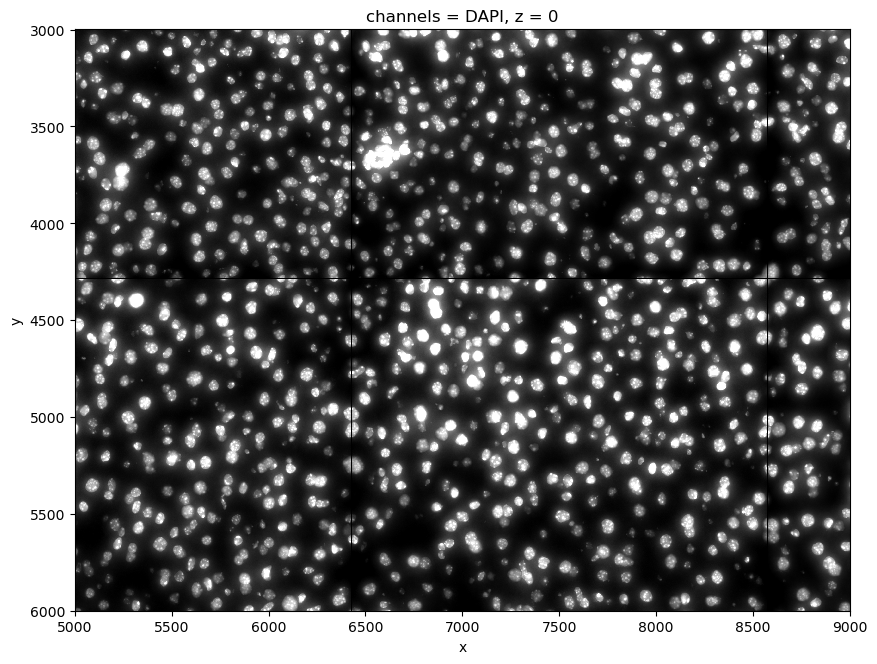

In [4]:
fc.plot_image_container( ic, layer='raw_image', crd=cfg.clean.small_size_vis )

In [5]:
ic = pf.clean(cfg, ic)

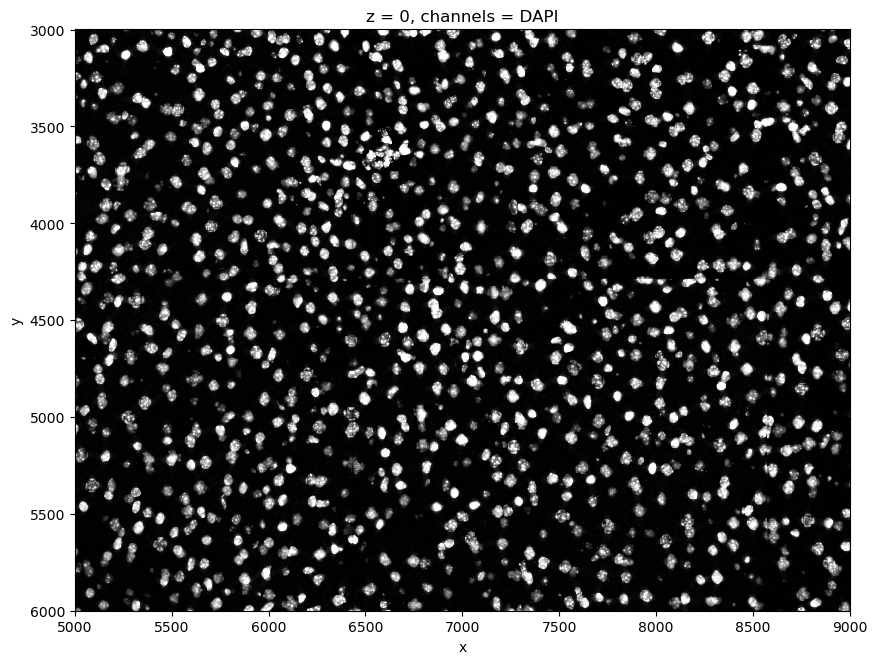

In [6]:
fc.plot_image_container( ic,  layer='corrected', crd=cfg.clean.small_size_vis )

In [16]:
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[9000, 15000, 12000, 18000 ] )
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[ 500, 5000, 500, 5000 ] )

In [7]:
sdata = pf.segment(cfg, ic) 

/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/rasterio/features.py:128: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  for s, v in _shapes(source, mask, connectivity, transform):


In [8]:
sdata = pf.allocate( cfg, sdata )

No transform matrix given, will use identity matrix.
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
creating masks from polygons
Created masks with shape (12864, 10720)
Calculate cell counts
Create anndata object
283 cells were filtered out based on size.
Start clustering


8
plot transcripts matrix for cell 13 and gene Ghr
Plotting 65 transcripts.
Selecting boundaries
Plotting boundaries
End plotting boundaries


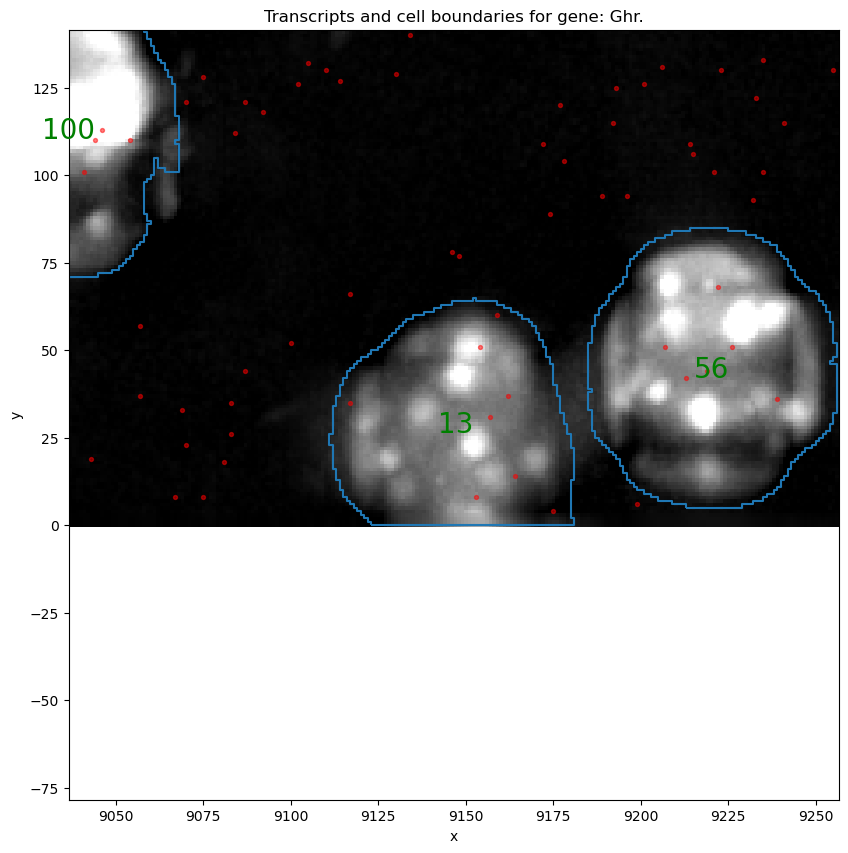

In [9]:
import dask.dataframe as dd

ddf=dd.read_parquet( os.path.join( output_dir, 'detected_transcripts_transformed.parquet' )  )

random_cell='13'
random_gene='Ghr'
 
print( sdata.table.layers[ 'raw_counts' ][  sdata.table.to_df().index.get_loc( random_cell ), sdata.table.to_df().columns.get_loc( random_gene )  ] )

diameter=60

if random_cell is not None and random_gene is not None:

    cell_center= sdata.table.obsm[ 'spatial' ][ sdata.table.to_df().index.get_loc( str(random_cell) ) ]
    crd=[ cell_center[0] - (diameter +50 ),
            cell_center[0] + (diameter +50 ),
            cell_center[1] - (diameter +50 ),
            cell_center[1] + (diameter +50 ) ]

    print( f"plot transcripts matrix for cell {random_cell} and gene {random_gene}" )

    fc.sanity_plot_transcripts_matrix(
        xarray=ic[ 'corrected' ],
        in_df=ddf,
        crd=crd,
        polygons=sdata[ 'nucleus_boundaries' ],
        plot_cell_number=True,
        gene=random_gene,
        )

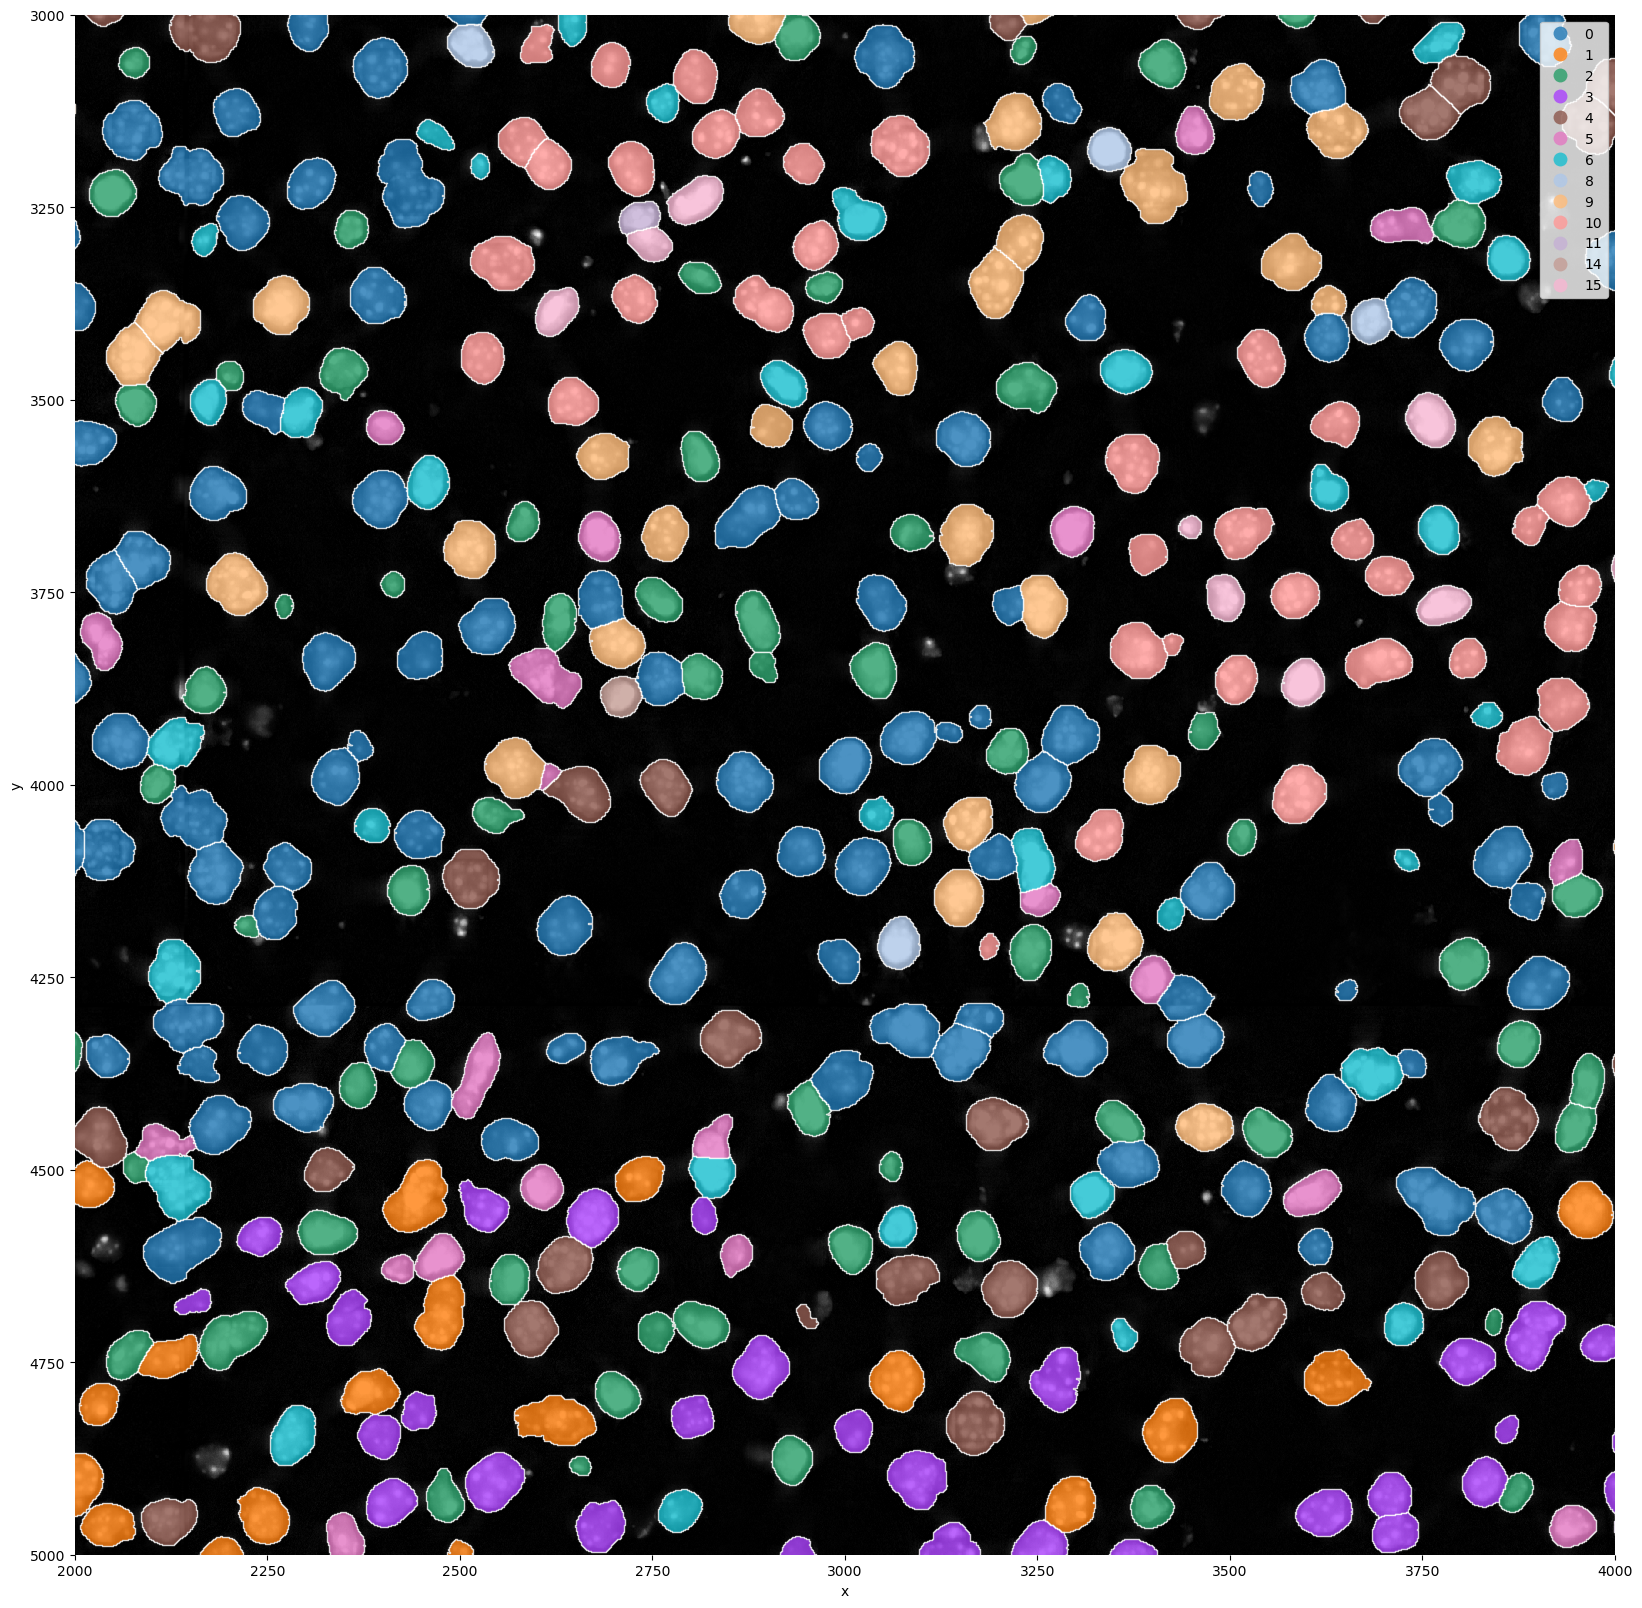

In [10]:
crd = [2000, 4000, 3000, 5000]

fc.plot_shapes(
    sdata, 
    column="leiden", 
    crd=crd, 
    alpha=0.8, 
    shapes_layer='nucleus_boundaries' 
    )

In [11]:
sdata, mg_dict = pf.annotate( cfg, sdata )

In [12]:
sdata=pf.visualize( cfg, sdata, mg_dict )

  0%|          | 0/1000 [00:00<?, ?/s]

In [13]:
sdata

SpatialData object with:
├── Images
│     ├── 'corrected': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (11276, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 11276 × 99
    obs: 'region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes', 'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden', 'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central', 'central_vein_EC45', 'stellateAll', 'stellate PeriPortal', 'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal', 'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45', 'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal', 'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs', 'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T 

In [14]:
sdata.write(  os.path.join( output_dir, 'sdata.zarr' ) )

no parent found for <ome_zarr.reader.Label object at 0x392bfdf60>: None


In [21]:
sdata[ 'nucleus_boundaries' ]

cells                                           geometry
4          4  POLYGON ((8169.000 342.000, 8184.000 342.000, ...
6          6  POLYGON ((0.000 8133.000, 0.000 8199.000, 2.00...
7          7  POLYGON ((8393.000 8130.000, 8394.000 8130.000...
11        11  POLYGON ((8466.000 8152.000, 8485.000 8152.000...
12        12  POLYGON ((8017.000 353.000, 8035.000 353.000, ...
...      ...                                                ...
22432  22432  POLYGON ((5512.000 8126.000, 5519.000 8126.000...
22439  22439  POLYGON ((1950.000 8128.000, 1957.000 8128.000...
22449  22449  POLYGON ((557.000 8134.000, 563.000 8134.000, ...
22459  22459  POLYGON ((2788.000 8138.000, 2800.000 8138.000...
22475  22475  POLYGON ((5351.000 8145.000, 5360.000 8145.000...

[11276 rows x 2 columns]

In [24]:
sdata.write(  os.path.join( output_dir, 'sdata.zarr'  )  )

no parent found for <ome_zarr.reader.Label object at 0x4132ccb20>: None


In [ ]:
# now do visualization step.

In [25]:
from spatialdata import read_zarr
sdata_load=read_zarr( os.path.join( output_dir, 'sdata.zarr'  )  )